<h1><center> PPOL564 | Data Science 1: Foundations </center><h1>
<h3><center> Lecture 15 <br><br><font color='grey'> A Geometric Interpretation of Ordinary Least Squares Regression </font></center></h3>

### Plan for Today:

- Derive the OLS regression from scratch

In [1]:
import numpy as np
import numpy.linalg as la # Easily access the linear algebra api
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## Generating Fake Data 

Let's generate some fake data where we know the true coefficient values. It's useful to know the population values when playing around with estimators because we can easily assess if our answers are correct or not.

In [2]:
np.random.seed(123)         # set seed to repoduce results
N = 100                     # set sample size
x = np.random.normal(0,1,N) # simulate a random variable
e = np.random.normal(0,1,N) # simulate error
y = 1 +  3*x + e            # generate some y that is a function of x and random error

Combine $X$ in into a design matrix with a columns of ones, which we'll use to estimate the constant.

In [3]:
X  = np.vstack([np.ones(N),x]).T
X[1:5,:]

array([[ 1.        ,  0.99734545],
       [ 1.        ,  0.2829785 ],
       [ 1.        , -1.50629471],
       [ 1.        , -0.57860025]])

Plot the data to get a feel for what is going on.

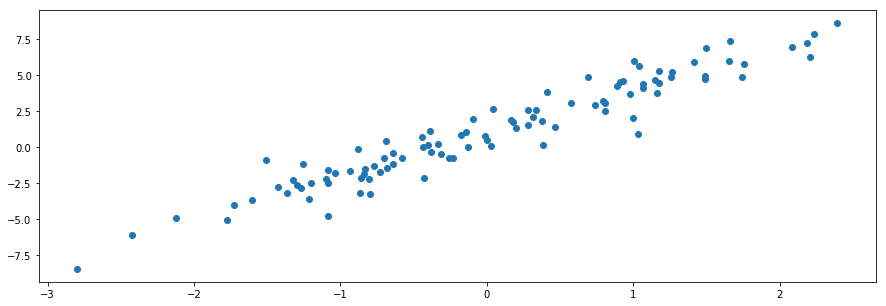

In [4]:
plt.figure(figsize=(15,5))
plt.scatter(X[:,1],y)
plt.show()

# Geometric Interpretation of Linear Regression

The following discussion will tie together what we've learned up to this point about linear algebra and apply it one of the most commonly used statistical learning model in our toolkit: linear regression.

## Design Matrix: Column Space of a Matrix of Explanatory Variables

Say we had a some variables in matrix $\textbf{X}$ that we wanted to use to predict some outcome $\textbf{y}$. That is, we have some variables that we want use to help train a model to predict future values of some outcome, like housing prices or the number of crimes.

$\textbf{X}_{n\times p}$ is a matrix with dimensions $n$ (the number of observations) and $p$ (the number of variables). We call this matrix a "design matrix". It holds all of the variables we intend to use in our prediction. 

First, as we've learned, if the column space of $\textbf{X}$ &mdash; $C(\textbf{X})$ &mdash; is of full rank (meaning each column vector is linearly independent) then we can think of $C(\textbf{X})$ as spanning the space in $\Re^p$ (which we'll represent for the sake of convenience as a two dimensional plane in $\Re^2$)

<img src="https://raw.githubusercontent.com/edunford/ppol564/master/lectures/Lecture_15/figures/col-space-fig.png" width="500">

## Outcome as a Vector 

As we've seen in previous lectures, our outcome variable can be represented as a column vector $\vec{\textbf{y}}$ with some magnitude and direction.

The dimensions of this column vector are $\textbf{y}_{n\times 1}$, where $n$ corresponds with the number of observations. 

##  Using a linear combination of $\textbf{X}_{n\times p}$ to approximate $\textbf{y}_{n\times 1}$

**_Our goal_** is to find a linear combination of the vectors in matrix $\textbf{X}_{n\times p}$ that yields $\textbf{y}_{n\times 1}$.

However, there might not be enough information in $\textbf{X}_{n\times p}$ to do this. 

Put differently, $\textbf{y}_{n\times 1}$ could be thought of as shooting off the plane of $\textbf{X}_{n\times p}$. 

<img src="https://raw.githubusercontent.com/edunford/ppol564/master/lectures/Lecture_15/figures/outcome-vec-fig.png" width="500">

Given that we can't find a linear combination of $\textbf{X}_{n\times p}$ to get to   $\textbf{y}_{n\times 1}$. We can approximate the relationship by taking the **projection** of $\textbf{y}_{n\times 1}$ ( $\hat{\textbf{y}}$) on $C(\textbf{X}_{n\times p})$.

This projection is going to be some **linear combination** of the column vectors of $\textbf{X}$. Recall that we can get anywhere in the span of $\textbf{X}$ by arbitrarily scaling and adding the linearly independent vectors.

$$ c_1\vec{x}_1 +  c_2\vec{x}_2 + \dots + c_p\vec{x}_p $$

We want to find the constants that generate the projection of $\hat{\textbf{y}}$. We'll call this vector $\beta$.

## Finding $\beta$

Recall that to find the projection of $\textbf{y}_{n\times 1}$ onto $C(\textbf{X}_{n\times p})$, we need to shoot an **orthogonal vector** from our plane to the vector $\textbf{y}_{n\times 1}$. We'll call this vector $\epsilon$. 

<img src="https://raw.githubusercontent.com/edunford/ppol564/master/lectures/Lecture_15/figures/full-fig.png" width="500">

Another way to think about $\epsilon$ is that it is the distance between vectors $\textbf{y}$ (the outcome) and $\hat{\textbf{y}}$ (our prediction).

<br>
<br>

\begin{equation}
e_{n \times 1} = \textbf{y}_{n \times 1} - \hat{\textbf{y}}_{n \times 1}
\end{equation}

<br>
<br>

Which we can re-express as

<br>
<br>

\begin{equation}
e_{n \times 1} = \textbf{y} - \textbf{X}\beta
\end{equation}

<br>
<br>

Recall that two vectors are **perpendicular (orthogonal) to one another when their dot products equal 0**. 

> Do you recall why?

We want $\epsilon$ epsilon to be orthogonal to the span of $\textbf{X}_{n\times p}$. Note that we must transpose $\textbf{X}_{n\times p}$ to multiply it by $\epsilon_{n\times 1}$

<br>
<br>

\begin{equation}
\textbf{X}_{p \times n}^T \cdot e_{n \times 1} = 0
\end{equation}

<br>
<br>

Now, let's rearrange so that we can isolate our vector $\beta$, which will yield the equation for $\beta$.

<br>
<br>

\begin{equation}
\textbf{X}_{p \times n}^T  \cdot ( \textbf{y}_{n \times 1} - \textbf{X}_{n \times p} \beta_{p \times 1} ) = 0
\end{equation}

<br>
<br>

\begin{equation}
\textbf{X}_{p \times n}^T \textbf{y}_{n \times 1} - \textbf{X}_{p \times n}^T \textbf{X}_{n \times p} \beta_{p \times 1} = 0
\end{equation}

<br>
<br>

\begin{equation}
\textbf{X}_{p \times n}^T \textbf{y}_{n \times 1} = \textbf{X}_{p \times n}^T \textbf{X}_{n \times p} \beta_{p \times 1}
\end{equation}

<br>
<br>

\begin{equation}
(\textbf{X}_{p \times n}^T \textbf{X}_{n \times p})^{-1} \textbf{X}_{p \times n}^T \textbf{y}_{n \times 1} = \beta_{p \times 1}
\end{equation}


<br>
<br>

This provides a formula to find our constants for the linear combination of $\textbf{X}$ that generates our projection $\hat{\textbf{y}}$

<br>
<br>

$$ \beta = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$

<br>
<br>

In [5]:
B = la.inv(X.T.dot(X)).dot(X.T.dot(y))
B

array([0.98091425, 2.98340745])

## Generating a prediction ( $\hat{\textbf{y}}$ )

As we've seen earlier, we can now generate a projection of $\textbf{y}$ by dotting the vector $\beta$ by $\textbf{X}$.

$$ \hat{\textbf{y}}_{n \times p} = \textbf{X}_{n \times p} \cdot \beta_{p \times 1}$$

In [6]:
y_hat = X.dot(B)

Let's plot this line through the data. As we see, we produced a linear fit. In fact, we produced the best linear fit. One that minimizes the sum of the squared error.

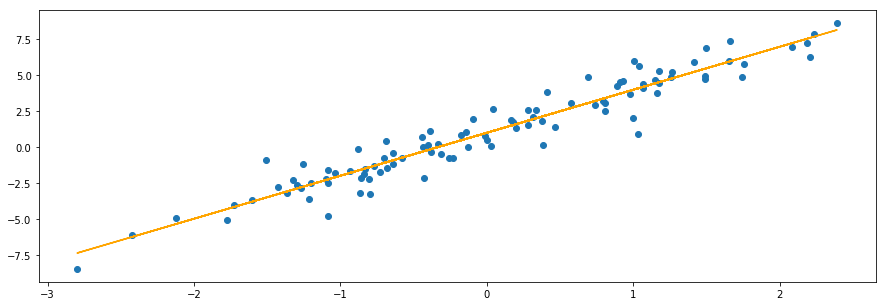

In [7]:
plt.figure(figsize=(15,5))
plt.scatter(X[:,1],y)
plt.plot(X[:,1],y_hat,color="orange")
plt.show()

## What is $e$? 

It's our error! We can think of it as the distance between our approximation of $\textbf{y}$ and the actual observed $\textbf{y}$. Can you see why $\epsilon$ minimizes the squared distance? 

Recall that we can get a vectors squared length by dotting the vector by itself.

<br>
<br>

$$ e_{1 \times n}^T \cdot e_{n \times 1} = ||e||^2$$

<br>
<br>

When $\epsilon$ is orthogonal to $\textbf{X}$ we're minimizing the length of $\epsilon$. Any other (non-orthogonal) vector would have a greater length than our current vector $\epsilon$. Consider the many grey lines below. Each one has an angle greater or less than 90 degrees, and each has a length longer than the orange line.

<img src="figures/alt-epsilon-fig.png" width="400">

In [8]:
e = y - y_hat

Note that when we plot the values of $e$ we can see that they are normally distributed with mean of 0. This is a key assumption of the linear model. 

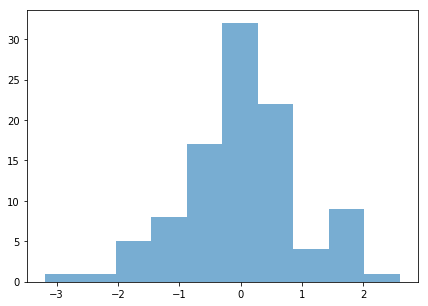

In [9]:
plt.figure(figsize=(7,5))
plt.hist(e,alpha=.6,bins=10)
plt.show()

In [10]:
e.mean().round(2)

-0.0

## Assessing Fit: $R^2$

Recall a projection is really a scaled down version of the vector being projected (e.g. $y$, the outcome vector). Keeping this in mind, there is an intuitive way to think of the model fit. 



We'll first need to center our outcome and prediction variables. 

<br>
<br>

$$\textbf{y}^* = \textbf{y}-\bar{y}$$ 

$$\hat{\textbf{y}}^* = \hat{\textbf{y}} - \bar{\hat{y}}$$

<br>
<br>

We can take the length of the projection and divided it by the length of the observed vector. 

<br>
<br>

$$ \frac{||\hat{\textbf{y}}^*||^2}{||\textbf{y}^* ||^2} $$

<br>
<br>

If the lengths are the same, then this ratio will equal 1 &mdash; that is, if $\textbf{y}$ lands on the plane created by $C(\textbf{X})$, then our projection and $\textbf{y}$ are equivalent (i.e. $\textbf{y}$ is a linear dependent on $C(\textbf{X})$). 

If the $\textbf{y}$ doesn't project onto $C(\textbf{X})$) at all then this ratio will equal 0 (meaning that all $C(\textbf{X})$ is completely orthogonal to our outcome vector $\textbf{y}$).

This ratio is our **R-Squared**, which we use to assess model fit.

In [11]:
y_hat_center = y_hat - y_hat.mean()
y_center = y - y.mean()

# R Squared
r_squared = y_hat_center.dot(y_hat_center)/y_center.dot(y_center)
r_squared

0.9233409734326696

An alternative specification of $R^2$ uses the length of the error vector instead.

<br>
<br>

$$ 1- \frac{||\hat{ e }||^2}{||\textbf{y}^* ||^2}$$

<br>
<br>

In [12]:
1 - (e.dot(e)/y_center.dot(y_center))

0.9233409734326684

## Calculating Uncertainty

Calculating the uncertainty in our estimates of $\beta$ relies on the Gauss-Markov assumptions and some manipulations of the resulting equations. (We won't not cover these in class, but see [here](https://web.stanford.edu/~mrosenfe/soc_meth_proj3/matrix_OLS_NYU_notes.pdf) for more details on how these estimates are derived and why they are unbiased given the assumptions). That said, let's think through how to calculate the uncertainty. 

Recall that our orthogonal vector $\textbf{e}$ is the error in the model. 

We can calculate our estimate of uncertainty by taking the length of $\textbf{e}$ and dividing it by our sample size $N$ adjusted for our degrees of freedom (i.e. the number of parameters we had $p$). 

<br>
<br>

$$\hat{\sigma}^2 = \frac{||e||^2}{n-p}   = \frac{e^T\cdot e}{n-p}  $$

<br>
<br>

This will provide use with a scalar that we'll then apply to our matrix of explanatory variables to calculate the **standard error** of our coefficients $\beta$.

<br>
<br>

$$ cov(\beta) = \hat{\sigma}^2 (\textbf{X}^T \textbf{X})^{-1} $$


<br>
<br>

$$ D = diag(cov(\beta)) $$

<br>
<br>

$$ se(\beta) = \sqrt{D} $$


<br>
<br>


In [13]:
# Let's calculate the uncertainty
n = X.shape[0]
p = X.shape[1]
sigma2 = e.T.dot(e)/(n-p)
sigma2

0.9598505223222045

In [14]:
cov_B = sigma2*la.inv(X.T.dot(X))
cov_B

array([[ 0.00960405, -0.00020442],
       [-0.00020442,  0.0075405 ]])

In [15]:
D = cov_B.diagonal()
D

array([0.00960405, 0.0075405 ])

In [16]:
se = np.sqrt(D)
se

array([0.09800024, 0.08683606])

### How did we do?

Let's compare our calculations those yielded by the `statsmodels` module, which can estimate a range of statistical models for us in Python.

In [17]:
# Use 

print(f'''
Our Manually Generated Values:

    Intercept: {B[0].round(4)} ({se[0].round(3)})
            x: {B[1].round(4)} ({se[1].round(3)})

    R-Squared: {r_squared.round(3)}
''')


Our Manually Generated Values:

    Intercept: 0.9809 (0.098)
            x: 2.9834 (0.087)

    R-Squared: 0.923



In [18]:
model = smf.ols('y ~ x', data=pd.DataFrame(dict(y=y,x=X[:,1]))).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1180.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           1.84e-56
Time:                        13:22:17   Log-Likelihood:                -138.83
No. Observations:                 100   AIC:                             281.7
Df Residuals:                      98   BIC:                             286.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9809      0.098     10.009      0.000       0.786       1.175
x              2.9834      0.087     34.357      0.000       2.811       3.156
==============================================================================
Omnibus:                        5.027   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.131
Skew:                          -0.308   Prob(JB):                       0.0769
Kurtosis:                       3.924   Cond. No.                         1.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# OLS as transformation matrices

<br>
<br>

We've seen that we can generate a projection of $\textbf{y}$ onto $C(\textbf{X})$ using the following formula.

<br>
<br>

$$\hat{\textbf{y}} = \textbf{X}\beta$$

<br>
<br>

Where

<br>
<br>

$$ \beta = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$

<br>
<br>

So we can re-write this as 

<br>
<br>

$$\hat{\textbf{y}} = \textbf{X}(\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$

<br>
<br>

$$\hat{\textbf{y}} = \textbf{H} \textbf{y}$$

<br>
<br>

$\textbf{H}$ is known as the "Hat Matrix". $\textbf{H}$ transforms the vector $\textbf{y}$ into $\hat{\textbf{y}}$.

In [19]:
H = X.dot(la.inv(X.T.dot(X)).dot(X.T))
y_hat2 = H.dot(y)

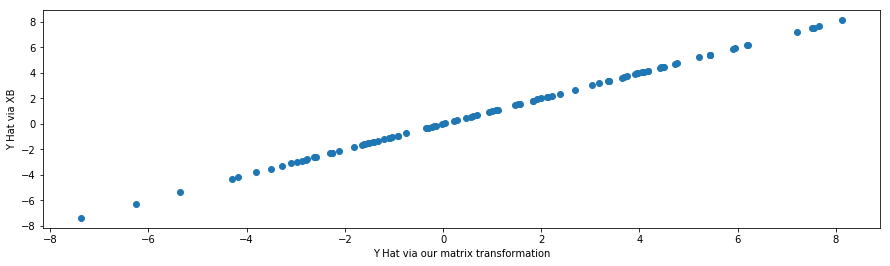

In [20]:
plt.figure(figsize=(15,4))
plt.scatter(y_hat,y_hat2)
plt.xlabel('Y Hat via our matrix transformation')
plt.ylabel('Y Hat via XB')
plt.show()

Likewise, consider the formula for our orthogonal vector $e$, our error. 

<br>
<br>

$$\textbf{e} = \textbf{y} - \textbf{X}\beta$$

<br>
<br>

$$\textbf{e} = \textbf{y} - \textbf{X}(\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T \textbf{y}$$

<br>
<br>

We can factor out $\textbf{y}$

<br>
<br>

$$\textbf{e} = (\textbf{I} - \textbf{X}(\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T) \textbf{y}$$

<br>
<br>

$$\textbf{e} = \textbf{M}\textbf{y}$$

<br>
<br>

$\textbf{M}$ transforms the vector $\textbf{y}$ into $\textbf{e}$.

<br>
<br>

Thus, we can decompose $\textbf{y}$ to the following expression.

<br>
<br>

$$ \textbf{y} =  \textbf{H} \textbf{y} + \textbf{M}\textbf{y} $$

<br>
<br>

<center>outcome = prediction + error</center>


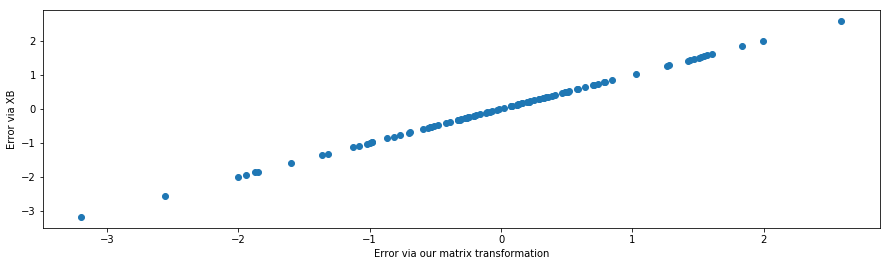

In [21]:
M = np.eye(N) - X.dot(la.inv(X.T.dot(X)).dot(X.T))
e2 = M.dot(y)
plt.figure(figsize=(15,4))
plt.scatter(e,e2)
plt.xlabel('Error via our matrix transformation')
plt.ylabel('Error via XB')
plt.show()

$\textbf{H}$ and  $\textbf{M}$ have some interesting properties.


1. They're orthogonal to one another. 

$$ \textbf{H}\textbf{M} = 0 $$

2. They're idempotent

$$ \textbf{H}\textbf{H} = \textbf{H} $$

$$ \textbf{M}\textbf{M} = \textbf{M} $$

3. When combined, they yield an identity matrix.

$$ \textbf{H} + \textbf{M} = \textbf{I} $$

Again, the point is to reinforce that when performing some operation on a vector, we can express that operation (function) as a matrix. 